In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')


In [20]:
df_final_demo.shape

(70609, 9)

In [21]:
df_final_experiment_clients.shape

(70609, 2)

In [22]:
# Merge clients and experiment
df_merge_clients=pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='left')
display(df_merge_clients)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [6]:
# Delete files with null variarion
df_merge_clients = df_merge_clients.dropna(subset=['Variation'])

In [7]:
df_merge_clients.shape

(50500, 10)

In [10]:
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [12]:
df_final_web_data_pt_1.shape


(343141, 5)

In [11]:
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [13]:
df_final_web_data_pt_2.shape

(412264, 5)

In [32]:
df_steps= pd.merge(df_final_web_data_pt_1, df_final_web_data_pt_2, 
                         on=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], 
                         how='outer')

In [34]:
df_steps.groupby('client_id').count()

,visitor_id,visit_id,process_step,date_time
client_id,,,,
169,5,5,5,5
336,2,2,2,2
546,5,5,5,5
555,5,5,5,5
647,5,5,5,5
...,...,...,...,...
9999729,11,11,11,11
9999768,12,12,12,12
9999832,2,2,2,2


In [38]:
df_merge_clients = pd.merge(df_final_demo, df_merge_clients, on='client_id', how='inner')
df_merge_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_x,...,logons_6_mnth_x,clnt_tenure_yr_y,clnt_tenure_mnth_y,clnt_age_y,gendr_y,num_accts_y,bal_y,calls_6_mnth_y,logons_6_mnth_y,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,6.0,...,9.0,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,7.0,...,9.0,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,5.0,...,9.0,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,16.0,...,6.0,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,12.0,...,3.0,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,4.0,...,5.0,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,12.0,...,6.0,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,16.0,...,3.0,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,21.0,...,4.0,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [36]:
df_merge_clients.shape

(70609, 10)

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_12320/3898706940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


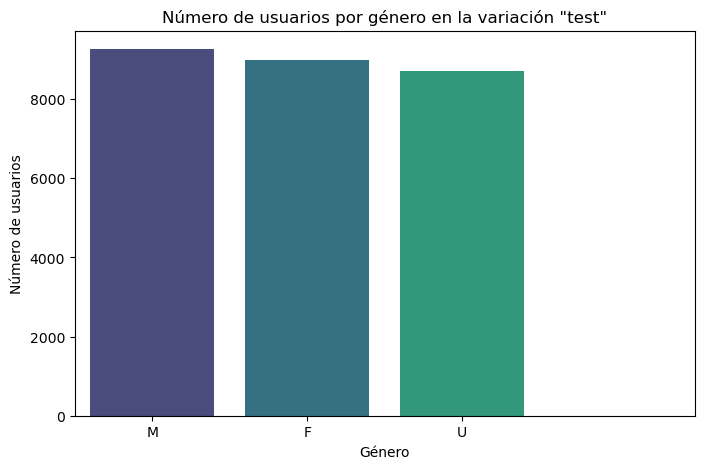

In [10]:
# Gráfico de barras para visionar el volumen de hombres y mujeres que probaron el test
df_test = df_merge_clients[df_merge_clients['Variation'] == 'Test']


gender_counts = df_test['gendr'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Número de usuarios por género en la variación "test"')
plt.xlabel('Género')
plt.ylabel('Número de usuarios')
plt.xticks(ticks=[0, 1, 2], labels=['M', 'F', 'U'])
plt.show()

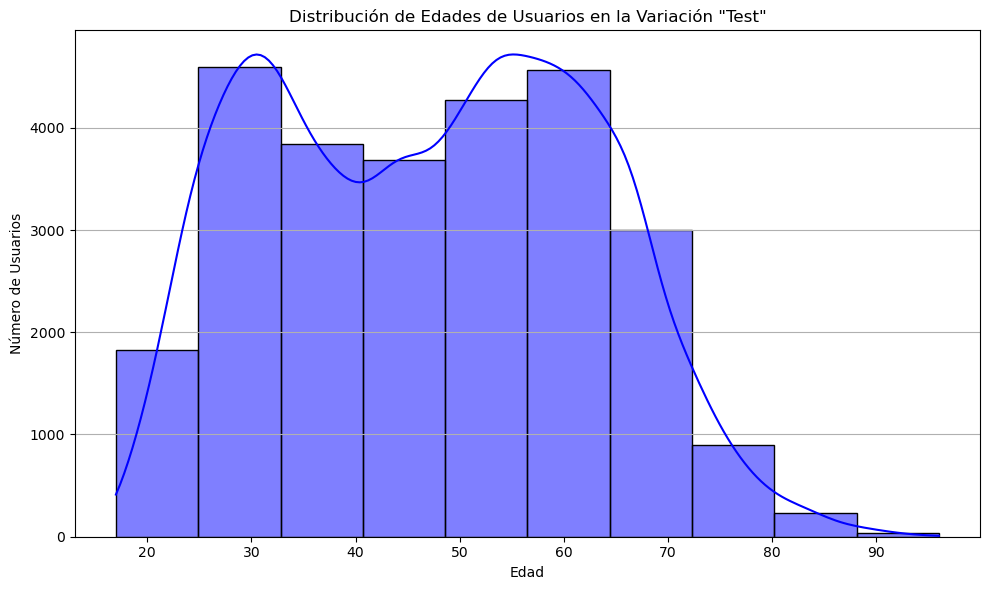

In [11]:
# Gráfico de barras para visionar las edades de los que probaron el test

df_test = df_merge_clients[df_merge_clients['Variation'] == 'Test']


plt.figure(figsize=(10, 6))
sns.histplot(df_test['clnt_age'], bins=10, kde=True, color='blue')
plt.title('Distribución de Edades de Usuarios en la Variación "Test"')
plt.xlabel('Edad')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y')

plt.tight_layout() 
plt.show()

In [25]:
df_final_web_data_pt_2.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [4]:
df_final_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [5]:
df_final_demo.head(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [6]:
df_final_demo.num_accts.unique()

array([ 2.,  5.,  3.,  4.,  6.,  7., nan,  1.,  8.])

In [9]:
df_final_demo.gendr.unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [10]:
df_final_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [14]:
df_final_demo.shape

(70609, 9)

In [15]:
df_final_demo.dropna(inplace=True)

In [16]:
df_final_demo.shape

(70594, 9)

In [17]:
df_final_demo.gendr.value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [18]:
df_final_demo['gendr'].replace('X', 'U', inplace=True)

In [19]:
df_final_demo.gendr.value_counts()

gendr
U    24125
M    23724
F    22745
Name: count, dtype: int64